In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wholesome_customers_data.csv')
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<Axes: xlabel='Milk', ylabel='Grocery'>

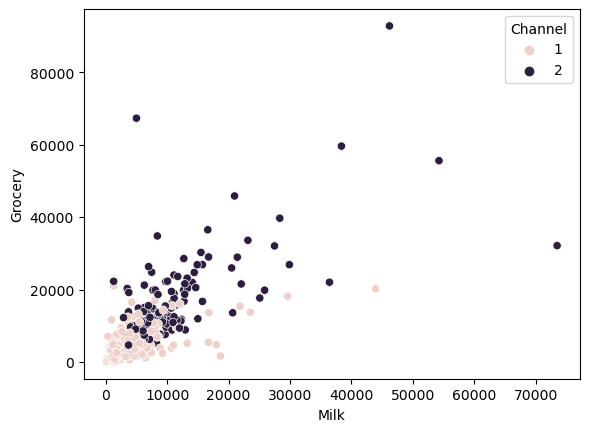

In [4]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Milk', ylabel='Count'>

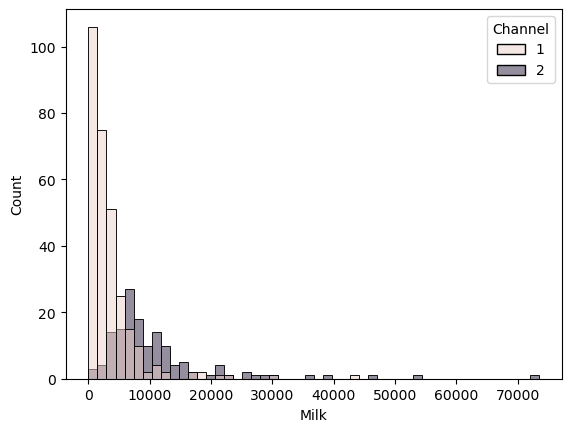

In [5]:
sns.histplot(df,x='Milk',hue='Channel')

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

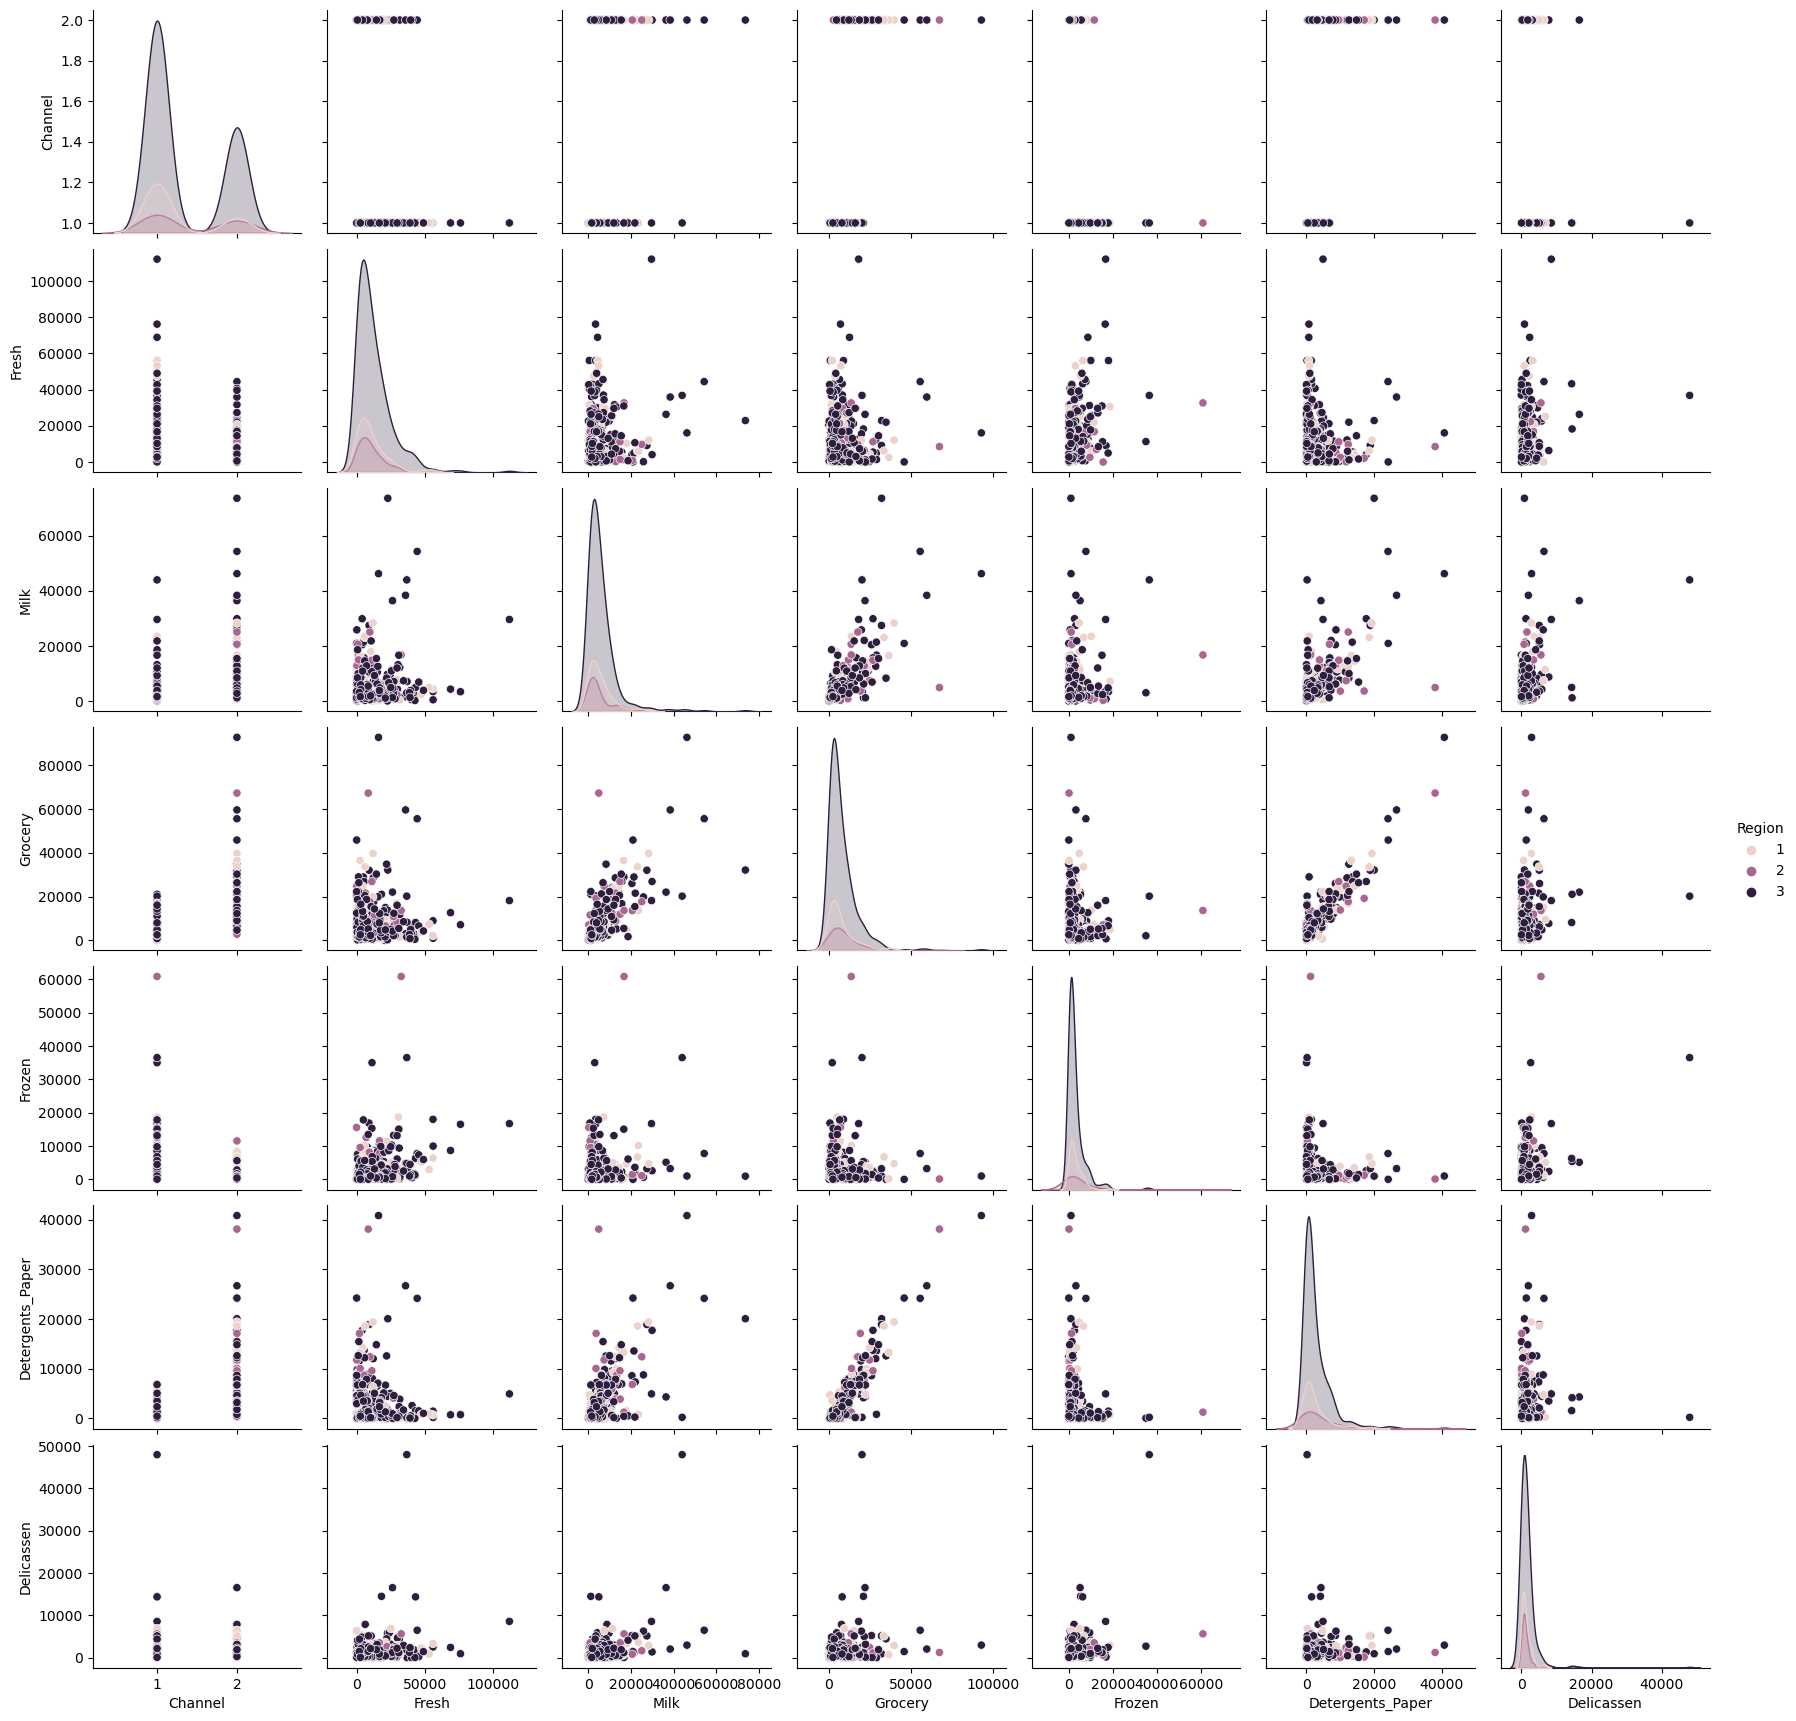

In [6]:
sns.pairplot(data=df, hue='Region')

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X = sc.fit_transform(df)
sc_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

### DBSCAN

In [10]:
sc_X.shape[1]

8

In [12]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for e in np.linspace(0.001,3,50):
    
    dbscan = DBSCAN(eps=e,min_samples=2*sc_X.shape[1])
    dbscan.fit(sc_X)
    
    outlier_percent.append(100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_))

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


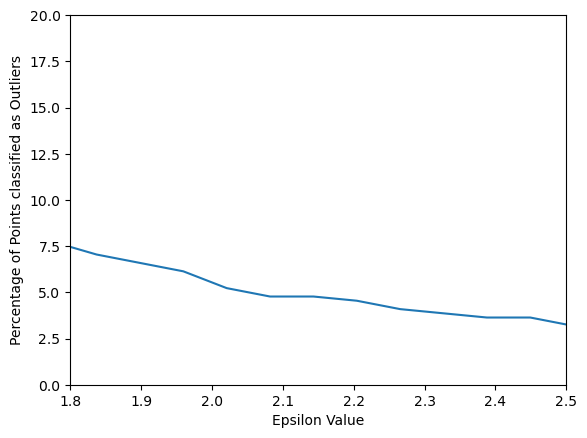

In [15]:
sns.lineplot(x=np.linspace(.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points classified as Outliers")
plt.xlabel('Epsilon Value')
plt.ylim(0,20)
plt.xlim(1.8,2.5)
plt.show()

In [17]:
dbscan = DBSCAN(eps=2,min_samples=2*sc_X.shape[1])
dbscan.fit(sc_X)

DBSCAN(eps=2, min_samples=16)

In [18]:
dbscan.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1, -1,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0, -1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0, -1,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1, -1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1

<Axes: xlabel='Milk', ylabel='Grocery'>

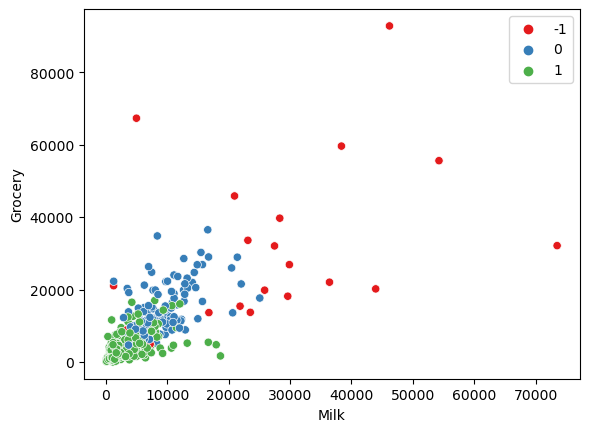

In [20]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue=dbscan.labels_, palette='Set1')

In [21]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

<Axes: xlabel='Milk', ylabel='Detergents_Paper'>

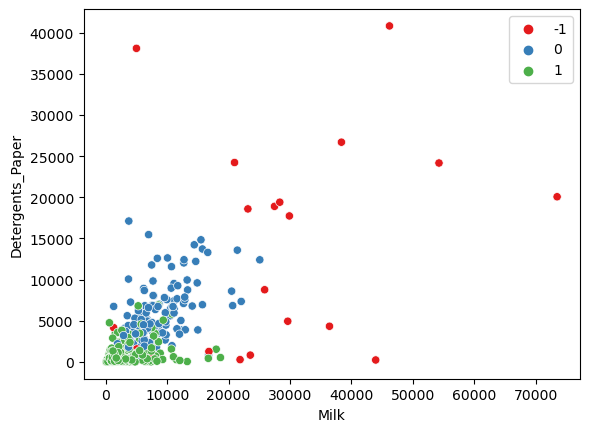

In [22]:
sns.scatterplot(data=df,x='Milk',y='Detergents_Paper',hue=dbscan.labels_, palette='Set1')

In [23]:
df['Labels'] = dbscan.labels_

In [24]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Labels  
0        1338       0  
1        1776       0  
2        7844       0  
3        1788       1  
4        5185       0

In [27]:
cats = df.drop(['Channel','Region'],axis=1)
cats_mean = cats.groupby('Labels').mean()

In [28]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data = minmax.fit_transform(cats_mean)
pd.DataFrame(data,index=cats_mean.index,columns=cats_mean.columns)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
Labels                                                                      
-1      1.000000  1.000000  1.000000  1.000000          1.000000    1.000000
 0      0.000000  0.280408  0.444551  0.000000          0.500087    0.073741
 1      0.210196  0.000000  0.000000  0.166475          0.000000    0.000000